<a href="https://colab.research.google.com/github/PaolaMaribel18/pry-ml-2023A/blob/main/pry_ml_2023a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Impacto del título en la popularidad en los de videos de Youtube

Elaborado por: Paola M. Aucapiña

##Antecedentes:
En la era digital actual, los videos de YouTube se han convertido en una forma popular de entretenimiento, información y expresión personal. Millones de usuarios de Internet visitan YouTube diariamente para ver una amplia variedad de contenido, desde videos musicales hasta tutoriales, vlogs, reseñas y mucho más. <img src="https://upload.wikimedia.org/wikipedia/commons/e/ef/Youtube_logo.png" alt="logo_youtube" align="right" width="200">
La plataforma de YouTube cuenta con un algoritmo sofisticado que muestra a los usuarios videos de tendencia basados en diversos factores, como el número de visualizaciones, la interacción del público y la popularidad general.



El título de un video juega un papel esencial en su atractivo y capacidad para captar la atención de los espectadores potenciales. Un título claro, descriptivo y relevante puede generar un mayor interés y, por lo tanto, atraer más visualizaciones. Dado que los creadores de contenido de YouTube buscan maximizar su alcance y aumentar su base de seguidores, es crucial comprender cómo el título del video puede influir en su popularidad.

##Objetivos:
* Identificar los temas más populares en los videos de tendencia de YouTube para cada región (MX y USA).
* Evaluar la correlación entre la elección del título del video y las metricas de popularidad,como el número de visualizaciones.
* Presentar los resultados del análisis de los datos recopilados durante el mes de mayo de 2023 para identificar los temas más populares en los videos de tendencia.

##Metodología:

###Fuente de Datos
https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset

### Importacion librerías

In [116]:
import pandas as pd
import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns



### Importar dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_US = pd.read_csv('/content/drive/MyDrive/ML_2023A/data/pry_IB/US_youtube_trending_data.csv')
df_MX = pd.read_csv('/content/drive/MyDrive/ML_2023A/data/pry_IB/MX_youtube_trending_data.csv')

####México

In [4]:
df_MX.head()


video_id                                              title  \
0  SsWHMAhshPQ  Ovi x Natanael Cano x Aleman x Big Soto - Veng...   
1  JOaeND0xUNk  Belinda y Christian Nodal cantan De los besos ...   
2  SV91jnGs--s        ¿QUIÉN HACE LOS MEJORES NUGGETS? | EL GUZII   
3  QgX0zn5nMyk  Martha Figueroa se disculpa públicamente con N...   
4  cKaM19oAwBM  MAQUILLAJE PARA KIMBERLY LOAIZA✨ RESISTENTE AL...   

            publishedAt                 channelId       channelTitle  \
0  2020-08-11T23:00:10Z  UC648rgJOboZlgcDbW00vTSA     Rancho Humilde   
1  2020-08-11T18:03:06Z  UCNVrBkfp4_TG9x4h5kvLeAQ          TV Azteca   
2  2020-08-11T19:57:02Z  UCuGn3ioftOo6jvHE1YK4Bfw           El Guzii   
3  2020-08-11T15:57:47Z  UCJPd6seu4JK4PZjVVTWb0QA                Hoy   
4  2020-08-11T21:55:08Z  UCs5w0QCxsEWz83vuQyOCnuA  Victor Guadarrama   

   categoryId         trending_date  \
0          10  2020-08-12T00:00:00Z   
1          24  2020-08-12T00:00:00Z   
2          26  2020-08-12T00:00:00Z   
3          24  2020-08-12T00:00:00Z   
4          26  2020-08-12T00:00:00Z   

                                                tags  view_count   likes  \
0  Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...      741028  113999   
1  tv azteca|videos de tv azteca|azteca uno|en su...      402507    8102   
2  El Guzii|Guzzi|Guzy|Guzii Style|Recetas Divert...      735044   62188   
3  Televisa|Televisa espectaculos|programa hoy te...      521751    4680   
4  MAQUILLAJE|CELEBS|ARTE|MAKEUP|PESTAÑAS|KIMBERL...      168118   24551   

   dislikes  comment_count                                  thumbnail_link  \
0      4380           5620  https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg   
1       831            803  https://i.ytimg.com/vi/JOaeND0xUNk/default.jpg   
2      1053           4100  https://i.ytimg.com/vi/SV91jnGs--s/default.jpg   
3      3129           2285  https://i.ytimg.com/vi/QgX0zn5nMyk/default.jpg   
4       537            782  https://i.ytimg.com/vi/cKaM19oAwBM/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  
0  Vengo De Nada - Ovi x Natanael Cano x Aleman x...  
1  Encendieron el escenario de La Voz. TV AztecaT...  
2  Si tienes 10 kg de sobre peso tal vez te haz p...  
3  Mira aquí el contenido exclusivo que tenemos p...  
4  No olvides suscribirte y activar la campanita ...

####Estados Unidos

In [7]:
df_US.head()

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count   likes  dislikes  comment_count  \
0     1514614  156908      5855          35313   
1     2381688  146739      2794          16549   
2     2038853  353787      2628          40221   
3      496771   23251      1856           7647   
4     1123889   45802       964           2196   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg              False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg              False   

   ratings_disabled                                        description  
0             False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1             False  While running her own modding shop, Ramya Pare...  
2             False  I left youtube for a month and this is what ha...  
3             False  Subscribe to XXL → http://bit.ly/subscribe-xxl...  
4             False  Transforming The LaBrant Family's empty white ...

### Procesamiento

#### Filtrar datos Mayo 2023

#####México

In [8]:
# Convertir la columna 'publishedAt' a tipo fecha
df_MX['publishedAt'] = pd.to_datetime(df_MX['publishedAt'])

# Filtrar los datos para el mes de mayo de 2023
mayo_2023_mx = df_MX[(df_MX['publishedAt'].dt.year == 2023) & (df_MX['publishedAt'].dt.month == 5)]

# Mostrar los datos filtrados
mayo_2023_mx.head()

video_id                                              title  \
199198  11wTIj8c9IQ               Champion Hog Rider?! (Season Event!)   
199200  KU_NwIFIbvI  ¿EXTRAÑO A MI EX? ¿NOS GUSTAMOS? | Domelipa Ft...   
199206  tacIxqNmB3c                         UN DATO INÚTIL SOBRE TI...   
199207  5CFkK4P3-5k  Clásico instantáneo | Liga Premier | Resumen -...   
199211  wm5XK2qHUtw  Medieval Upheaval With Dark Ages King! (Clash ...   

                     publishedAt                 channelId       channelTitle  \
199198 2023-05-01 09:00:01+00:00  UC_F8DoJf9MZogEOU51TpTbQ       Clash Royale   
199200 2023-05-01 01:30:12+00:00  UC6x71GcLpFRJC15pWnq12NQ           Domelipa   
199206 2023-05-01 02:00:18+00:00  UCa_M7VbdEVTc1yRMclRmjpw        Islas Vlogs   
199207 2023-05-01 00:00:02+00:00  UCW8leg1zCALE3STqOhisitA  Paramount+ México   
199211 2023-05-01 08:00:32+00:00  UCD1Em4q90ZUK2R5HKesszJg     Clash of Clans   

        categoryId         trending_date  \
199198          20  2023-05-02T00:00:00Z   
199200          24  2023-05-02T00:00:00Z   
199206          22  2023-05-02T00:00:00Z   
199207          24  2023-05-02T00:00:00Z   
199211          20  2023-05-02T00:00:00Z   

                                                     tags  view_count  likes  \
199198  Clash Royale|Clash Royale Game|Supercell|Super...      830297  18908   
199200                                             [None]      296548  30707   
199206                                             [None]      240490  12709   
199207  paramount+|paramount plus latinoamerica|paramo...      170806   2874   
199211  clash of clans|COC|Clash of Clans Gameplay|Cla...     1192511  26301   

        dislikes  comment_count  \
199198         0           1284   
199200         0           1296   
199206         0            196   
199207         0            229   
199211         0            908   

                                        thumbnail_link  comments_disabled  \
199198  https://i.ytimg.com/vi/11wTIj8c9IQ/default.jpg              False   
199200  https://i.ytimg.com/vi/KU_NwIFIbvI/default.jpg              False   
199206  https://i.ytimg.com/vi/tacIxqNmB3c/default.jpg              False   
199207  https://i.ytimg.com/vi/5CFkK4P3-5k/default.jpg              False   
199211  https://i.ytimg.com/vi/wm5XK2qHUtw/default.jpg              False   

        ratings_disabled                                        description  
199198             False  Hog Rider Terry from Books of Clash comic book...  
199200             False                                                NaN  
199206             False                 Cazando los mejores DATOS INUTILES  
199207             False  Goles en tiempo de compensación nos regalaron ...  
199211             False  Protect your fiefdom and charge your foes with...

In [9]:
mayo_2023_mx.shape

(6177, 16)

#####Estados Unidos

In [10]:
# Convertir la columna 'publishedAt' a tipo fecha
df_US['publishedAt'] = pd.to_datetime(df_US['publishedAt'])

# Filtrar los datos para el mes de mayo de 2023
mayo_2023_us = df_US[(df_US['publishedAt'].dt.year == 2023) & (df_US['publishedAt'].dt.month == 5)]

# Mostrar los datos filtrados
mayo_2023_us.head()

video_id                                              title  \
199390  SuPo5UjYyE4  Stephen A. REVEALS what spells trouble for the...   
199391  C-WQcCqecHg             Apex Legends: Arsenal Gameplay Trailer   
199393  EU04UEnhv_o  Jack Harlow - They Don't Love It [Official Mus...   
199395  wIBZ7UcQmDU  [최초공개] LE SSERAFIM(르세라핌) - UNFORGIVEN (feat. N...   
199397  FJqd58_WgGo                    Zach Bryan - Oklahoma Smokeshow   

                     publishedAt                 channelId  channelTitle  \
199390 2023-05-01 15:37:17+00:00  UCVSSpcmZD2PwPBqb8yKQKBA   NBA on ESPN   
199391 2023-05-01 15:00:15+00:00  UC0ZV6M2THA81QT9hrVWJG3A  Apex Legends   
199393 2023-05-01 16:00:08+00:00  UC6vZl7Qj7JglLDmN_7Or-ZQ   Jack Harlow   
199395 2023-05-01 11:25:34+00:00  UCTQVIXvcHrR9jYoJ6qaBAow            M2   
199397 2023-05-01 04:24:38+00:00  UCwK3C8Vgphad4PweezfUBAQ    Zach Bryan   

        categoryId         trending_date  \
199390          17  2023-05-02T00:00:00Z   
199391          20  2023-05-02T00:00:00Z   
199393          10  2023-05-02T00:00:00Z   
199395          24  2023-05-02T00:00:00Z   
199397          10  2023-05-02T00:00:00Z   

                                                     tags  view_count   likes  \
199390  Stephen A. REVEALS what spells trouble for the...      335324    4540   
199391  apex legends|apex|apex legends season 17|apex ...     1444465   56517   
199393  jack harlow|jack rapper|harlow rapper|private ...      443608   38141   
199395  엠넷|Mnet|엠투|M2|MPD|엠피디|Kpop|K-Pop|K팝|아이돌|한국|라이브...     3561258  240804   
199397                                             [None]      163561   10006   

        dislikes  comment_count  \
199390         0           2263   
199391         0           3800   
199393         0           1859   
199395         0           5594   
199397         0            501   

                                        thumbnail_link  comments_disabled  \
199390  https://i.ytimg.com/vi/SuPo5UjYyE4/default.jpg              False   
199391  https://i.ytimg.com/vi/C-WQcCqecHg/default.jpg              False   
199393  https://i.ytimg.com/vi/EU04UEnhv_o/default.jpg              False   
199395  https://i.ytimg.com/vi/wIBZ7UcQmDU/default.jpg              False   
199397  https://i.ytimg.com/vi/FJqd58_WgGo/default.jpg              False   

        ratings_disabled                                        description  
199390             False  On First Take, Stephen A. Smith, Kendrick Perk...  
199391             False  Show your caliber in Apex Legends: Arsenal. Th...  
199393             False  Jack Harlow - They Don't Love ItListen to 'Jac...  
199395             False  [LE SSERAFIM COMEBACK SHOW UNFORGIVEN] LE SSER...  
199397             False                                                NaN

In [11]:
mayo_2023_us.shape

(6191, 16)

#### Título y Número de Visualizaciones

#####México

In [12]:
# Seleccionar las columnas 'title' y 'view_count'
data_mx = mayo_2023_mx[['title', 'view_count']]

# Imprimir los resultados
data_mx.head()

title  view_count
199198               Champion Hog Rider?! (Season Event!)      830297
199200  ¿EXTRAÑO A MI EX? ¿NOS GUSTAMOS? | Domelipa Ft...      296548
199206                         UN DATO INÚTIL SOBRE TI...      240490
199207  Clásico instantáneo | Liga Premier | Resumen -...      170806
199211  Medieval Upheaval With Dark Ages King! (Clash ...     1192511

Identificar valores nulos

In [13]:
missing_values = data_mx[['title', 'view_count']].isnull().sum()

# Imprimir el número de valores faltantes o nulos en cada columna
missing_values

title         0
view_count    0
dtype: int64

Verificar formato de los datos

In [14]:
data_mx.dtypes

title         object
view_count     int64
dtype: object

Ordenar los datos en base a view_count

In [15]:
data_mx_sorted = data_mx.sort_values('view_count', ascending=True)
data_mx_sorted

title  view_count
199838  Live at the Met Gala With Vogue           0
201597  Live at the Met Gala With Vogue           0
201149  Live at the Met Gala With Vogue           0
199610  Live at the Met Gala With Vogue           0
200463  Live at the Met Gala With Vogue           0
...                                 ...         ...
206739  Ages 1 - 100 Fight For $500,000   111343139
206944  Ages 1 - 100 Fight For $500,000   113492235
207149  Ages 1 - 100 Fight For $500,000   115652815
207389  Ages 1 - 100 Fight For $500,000   118788141
207592  Ages 1 - 100 Fight For $500,000   121097804

[6177 rows x 2 columns]

Dividir el conjunto de datos ordenados quintiles y crear una nueva columna en la base
de datos para almacenar las categorías basadas en los quintiles llamada
category_view_count.

In [16]:
#Asignamos los datos ordenados a una nueva variable
data_mx_1=data_mx_sorted
# Calcular los quintiles y asignar las categorías a la columna 'category_view_count'
data_mx_1['category_view_count'] = pd.qcut(data_mx_1['view_count'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])


En donde los quintiles desde Q1 a Q2 van desde el menos visto al más visto

In [17]:
data_mx_1

title  view_count category_view_count
199838  Live at the Met Gala With Vogue           0                  Q1
201597  Live at the Met Gala With Vogue           0                  Q1
201149  Live at the Met Gala With Vogue           0                  Q1
199610  Live at the Met Gala With Vogue           0                  Q1
200463  Live at the Met Gala With Vogue           0                  Q1
...                                 ...         ...                 ...
206739  Ages 1 - 100 Fight For $500,000   111343139                  Q5
206944  Ages 1 - 100 Fight For $500,000   113492235                  Q5
207149  Ages 1 - 100 Fight For $500,000   115652815                  Q5
207389  Ages 1 - 100 Fight For $500,000   118788141                  Q5
207592  Ages 1 - 100 Fight For $500,000   121097804                  Q5

[6177 rows x 3 columns]

#####Estados Unidos



In [18]:
# Seleccionar las columnas 'title' y 'view_count'
data_us = mayo_2023_us[['title', 'view_count']]

# Imprimir los resultados
data_us.head()

title  view_count
199390  Stephen A. REVEALS what spells trouble for the...      335324
199391             Apex Legends: Arsenal Gameplay Trailer     1444465
199393  Jack Harlow - They Don't Love It [Official Mus...      443608
199395  [최초공개] LE SSERAFIM(르세라핌) - UNFORGIVEN (feat. N...     3561258
199397                    Zach Bryan - Oklahoma Smokeshow      163561

Identificar valores nulos

In [19]:
missing_values = data_us[['title', 'view_count']].isnull().sum()

# Imprimir el número de valores faltantes o nulos en cada columna
missing_values

title         0
view_count    0
dtype: int64

Verificar formato de los datos

In [20]:
data_us.dtypes

title         object
view_count     int64
dtype: object

Ordenar los datos en base a view_count

In [21]:
data_us_sorted = data_us.sort_values('view_count', ascending=True)
data_us_sorted

title  view_count
200970  Live at the Met Gala With Vogue           0
200287  Live at the Met Gala With Vogue           0
201188  Live at the Met Gala With Vogue           0
200044  Live at the Met Gala With Vogue           0
200735  Live at the Met Gala With Vogue           0
...                                 ...         ...
205422  Ages 1 - 100 Fight For $500,000    84406948
205657  Ages 1 - 100 Fight For $500,000    90058865
205893  Ages 1 - 100 Fight For $500,000    95520120
206127  Ages 1 - 100 Fight For $500,000   100294791
206356  Ages 1 - 100 Fight For $500,000   103921838

[6191 rows x 2 columns]

Dividir el conjunto de datos ordenados quintiles y crear una nueva columna en la base
de datos para almacenar las categorías basadas en los quintiles llamada
category_view_count.

In [22]:
#Asignamos los datos ordenados a una nueva variable
data_us_1=data_us_sorted
# Calcular los quintiles y asignar las categorías a la columna 'category_view_count'
data_us_1['category_view_count'] = pd.qcut(data_us_1['view_count'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])


En donde los quintiles desde Q1 a Q2 van desde el menos visto al más visto

In [23]:
data_us_1

title  view_count category_view_count
200970  Live at the Met Gala With Vogue           0                  Q1
200287  Live at the Met Gala With Vogue           0                  Q1
201188  Live at the Met Gala With Vogue           0                  Q1
200044  Live at the Met Gala With Vogue           0                  Q1
200735  Live at the Met Gala With Vogue           0                  Q1
...                                 ...         ...                 ...
205422  Ages 1 - 100 Fight For $500,000    84406948                  Q5
205657  Ages 1 - 100 Fight For $500,000    90058865                  Q5
205893  Ages 1 - 100 Fight For $500,000    95520120                  Q5
206127  Ages 1 - 100 Fight For $500,000   100294791                  Q5
206356  Ages 1 - 100 Fight For $500,000   103921838                  Q5

[6191 rows x 3 columns]

#### Subconjunto de datos por Quintiles

#####México

######Datos Q1

In [57]:
# Filtrar los datos correspondientes a la categoría "Q1"
q1_data_mx = data_mx_1.loc[data_mx_1['category_view_count'] == 'Q1']
q1_data_mx

title  view_count  \
199838                    Live at the Met Gala With Vogue           0   
201597                    Live at the Met Gala With Vogue           0   
201149                    Live at the Met Gala With Vogue           0   
199610                    Live at the Met Gala With Vogue           0   
200463                    Live at the Met Gala With Vogue           0   
...                                                   ...         ...   
203435  LOS NÚMEROS-PITIN TOYS FT NUEVOS REBELDES (EN ...      290982   
203078             Los Bukis - Te amo, mamá | Lyric video      291127   
202749                    GRACIAS MADRECITA - GABBY TAMEZ      291195   
202134  Se Confirma Muerte de Carlos Parra Vocalista d...      291198   
203610         JuanSGuarnizo vs Inteligencia artificial 🤖      291482   

       category_view_count  
199838                  Q1  
201597                  Q1  
201149                  Q1  
199610                  Q1  
200463                  Q1  
...                    ...  
203435                  Q1  
203078                  Q1  
202749                  Q1  
202134                  Q1  
203610                  Q1  

[1236 rows x 3 columns]

Procesamiento del campo "title" para extraer las palabras más usadas

In [58]:
!pip install stopwordsiso

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from nltk.tokenize import word_tokenize
import stopwordsiso
from stopwordsiso import stopwords

In [60]:
stopwordsiso.langs()

{'af',
 'ar',
 'bg',
 'bn',
 'br',
 'ca',
 'cs',
 'da',
 'de',
 'el',
 'en',
 'eo',
 'es',
 'et',
 'eu',
 'fa',
 'fi',
 'fr',
 'ga',
 'gl',
 'gu',
 'ha',
 'he',
 'hi',
 'hr',
 'hu',
 'hy',
 'id',
 'it',
 'ja',
 'ko',
 'ku',
 'la',
 'lt',
 'lv',
 'mr',
 'ms',
 'nl',
 'no',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'so',
 'st',
 'sv',
 'sw',
 'th',
 'tl',
 'tr',
 'uk',
 'ur',
 'vi',
 'yo',
 'zh',
 'zu'}

In [61]:
# Obtener las stopwords en varios idiomas

stop_words_all=stopwords(['af', 'ar', 'bg', 'bn', 'br', 'ca', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
                          'fa', 'fi', 'fr', 'ga', 'gl', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'it', 'ja',
                          'ko', 'ku', 'la', 'lt', 'lv', 'mr', 'ms', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl',
                          'so', 'st', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zh', 'zu'])

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q1_data_mx['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha()  and word not in stop_words_all]
    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words1 = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words1:
    print(word, "-", freq)

liga - 68
chivas - 51
video - 51
resumen - 49
oficial - 40
tigres - 40
mamá - 39
clausura - 39
familia - 36
méxico - 34


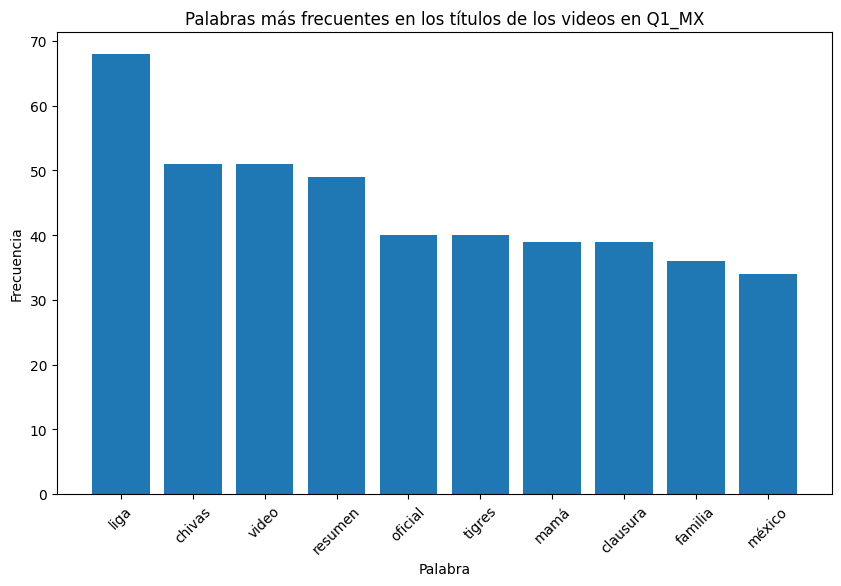

In [62]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words1)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q1_MX')
plt.xticks(rotation=45)
plt.show()

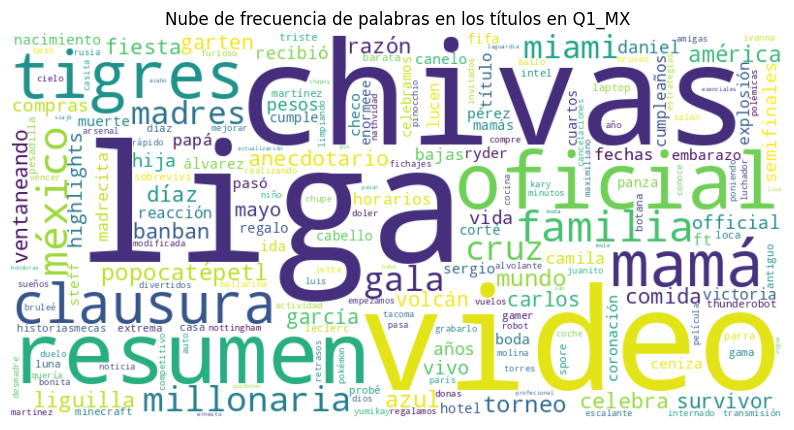

In [64]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q1_MX')
plt.show()


######Datos Q2

In [65]:
# Filtrar los datos correspondientes a la categoría "Q2"
q2_data_mx = data_mx_1.loc[data_mx_1['category_view_count'] == 'Q2']
q2_data_mx

title  view_count  \
201472      24 HORAS DE VIAJE CON MI HERMANO!!! Soy Fredy      291596   
205274  Entramos a CAMERINOS con FUERZA REGIDA en MTY ...      291672   
203634  7 HACKS de CONSTRUCCIÓN SEGURA de la FAMILIA B...      291969   
202994    Craig y Eric: el dúo más cabr*n en Drake y Josh      292525   
207131  Cuando un Peleador Mexicano Acabó con un Gigan...      292846   
...                                                   ...         ...   
201712  Maluma dedica emotivo mensaje a Shakira en ple...      612092   
203565  #SaskiaPodcast #PPL #Privadasdelalibertad EP 2...      612255   
204838  Esculpiendo los ORIGENES de la BANBAN GANG FAN...      612653   
201462  ¡NO DEJES que EL VENADO MALDITO te ATRAPE!🦌🔪😈e...      612655   
203917  La Historia Completa de Amanda la Aventurera (...      612967   

       category_view_count  
201472                  Q2  
205274                  Q2  
203634                  Q2  
202994                  Q2  
207131                  Q2  
...                    ...  
201712                  Q2  
203565                  Q2  
204838                  Q2  
201462                  Q2  
203917                  Q2  

[1235 rows x 3 columns]

Procesamiento del campo "title" para extraer las palabras más usadas

In [66]:
# Obtener las stopwords en varios idiomas

stop_words_all=stopwords(['af', 'ar', 'bg', 'bn', 'br', 'ca', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
                          'fa', 'fi', 'fr', 'ga', 'gl', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'it', 'ja',
                          'ko', 'ku', 'la', 'lt', 'lv', 'mr', 'ms', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl',
                          'so', 'st', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zh', 'zu'])


# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q2_data_mx['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha()  and word not in stop_words_all]
    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words2 = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words2:
    print(word, "-", freq)

video - 146
oficial - 79
official - 62
minecraft - 60
banban - 46
garten - 37
mundo - 32
cocinar - 31
pesos - 26
historia - 26


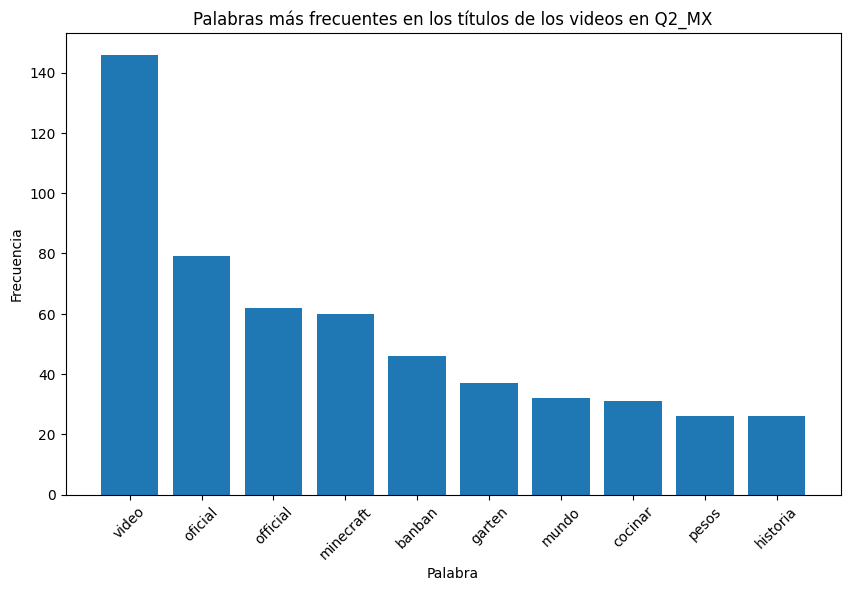

In [67]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words2)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q2_MX')
plt.xticks(rotation=45)
plt.show()

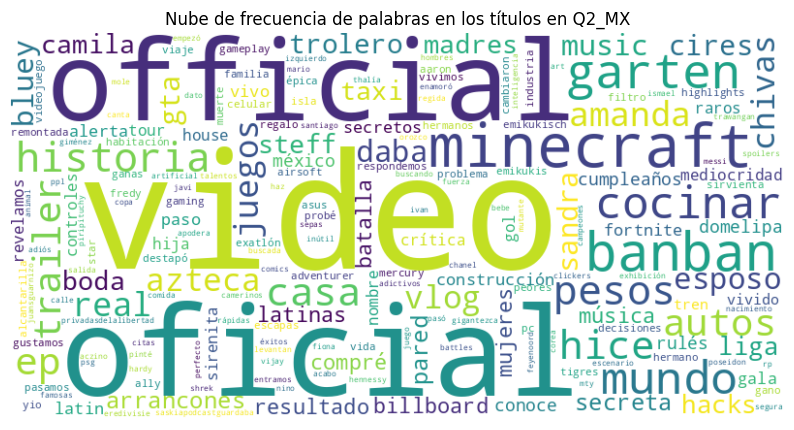

In [68]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q2_MX')
plt.show()


######Datos Q3

In [75]:
# Filtrar los datos correspondientes a la categoría "Q3"
q3_data_mx = data_mx_1.loc[data_mx_1['category_view_count'] == 'Q3']
q3_data_mx

title  view_count  \
203468  Jesús Adrián Romero, Adriel Favela - El Ciel...      612997   
203716           LAS 20 POLÉMICAS MÁS GRANDES DE FORTNITE      613552   
200946            BARÇA 1-0 OSASUNA | LALIGA 2022/23 MD33      613742   
202209      Ghost - Phantom Of The Opera (Official Audio)      613836   
205253  FINAL del MODO CARRERA de LOS PIBES FC (ÚLTIMO...      613905   
...                                                   ...         ...   
201799                                           Abcdario     1081265   
202063  Grupo Marca Registrada x Carín León - Me Haces...     1081894   
200013  León irá a la final por la revancha de la Liga...     1082446   
204352     ¡Probando todos los Tacos del OXXO! | El Guzii     1082799   
200050  ¿QUIÉN ES EL ASESINO? 🤔🔪 MOMENTOS DIVERTIDOS e...     1082967   

       category_view_count  
203468                  Q3  
203716                  Q3  
200946                  Q3  
202209                  Q3  
205253                  Q3  
...                    ...  
201799                  Q3  
202063                  Q3  
200013                  Q3  
204352                  Q3  
200050                  Q3  

[1235 rows x 3 columns]

Procesamiento del campo "title" para extraer las palabras más usadas

In [76]:
# Obtener las stopwords en varios idiomas

stop_words_all=stopwords(['af', 'ar', 'bg', 'bn', 'br', 'ca', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
                          'fa', 'fi', 'fr', 'ga', 'gl', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'it', 'ja',
                          'ko', 'ku', 'la', 'lt', 'lv', 'mr', 'ms', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl',
                          'so', 'st', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zh', 'zu'])


# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q3_data_mx['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha()  and word not in stop_words_all]
    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words3 = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words3:
    print(word, "-", freq)

video - 139
banban - 93
minecraft - 83
oficial - 70
official - 68
garten - 67
amor - 62
invencible - 55
casa - 38
shakira - 34


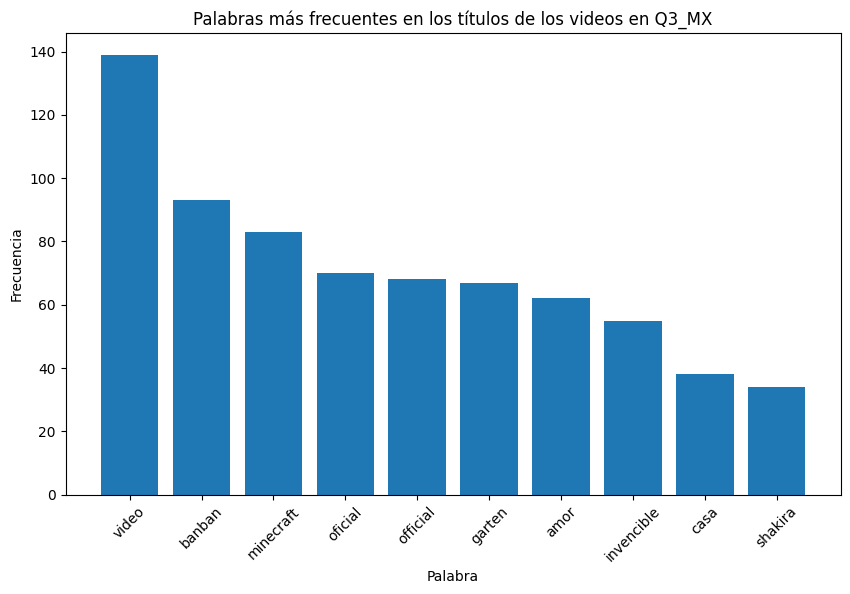

In [77]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words3)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q3_MX')
plt.xticks(rotation=45)
plt.show()

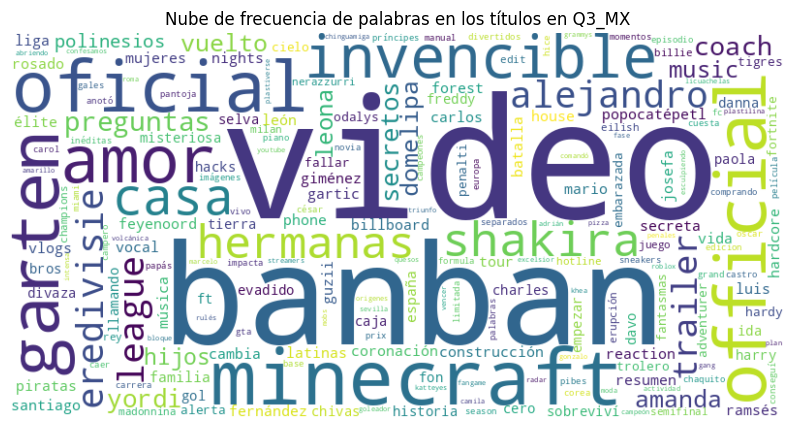

In [78]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q3_MX')
plt.show()


######Datos Q4

In [73]:
# Filtrar los datos correspondientes a la categoría "43"
q4_data_mx = data_mx_1.loc[data_mx_1['category_view_count'] == 'Q4']
q4_data_mx

title  view_count  \
205289                                   Did you miss me?     1083340   
203085              La evolución de Super Mario (ANIMADA)     1083533   
206769  TAG DE LOS PAPÁS 👶🏼🍼 ¿Estamos separados? 💔 | C...     1083641   
205424  ¡HAUL! Un día conmigo decorando mi Nueva Casaa...     1084024   
200801        MAIYE ESTÁ EMBARAZADA 🤰🏻😳// FAMILIA RECOCHA     1086358   
...                                                   ...         ...   
203737  Stray Kids ＜★★★★★ (5-STAR)＞ UNVEIL : TRACK 3 죽...     2486136   
202161  Luis R Conriquez, Farruko - Me Metí En El Rued...     2488238   
201267   Stray Kids ＜★★★★★ (5-STAR)＞ UNVEIL : TRACK 1 DLC     2489530   
205190  Conan Gray - Never Ending Song (Official Music...     2489531   
201019  ¡IMPOSIBLE SALIR de la GUARDERIA ABANDONADA! 😱...     2499875   

       category_view_count  
205289                  Q4  
203085                  Q4  
206769                  Q4  
205424                  Q4  
200801                  Q4  
...                    ...  
203737                  Q4  
202161                  Q4  
201267                  Q4  
205190                  Q4  
201019                  Q4  

[1235 rows x 3 columns]

Procesamiento del campo "title" para extraer las palabras más usadas

In [79]:
# Obtener las stopwords en varios idiomas

stop_words_all=stopwords(['af', 'ar', 'bg', 'bn', 'br', 'ca', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
                          'fa', 'fi', 'fr', 'ga', 'gl', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'it', 'ja',
                          'ko', 'ku', 'la', 'lt', 'lv', 'mr', 'ms', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl',
                          'so', 'st', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zh', 'zu'])

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q4_data_mx['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha()  and word not in stop_words_all]
    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words4 = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words4:
    print(word, "-", freq)

video - 238
official - 130
oficial - 116
resumen - 81
tudn - 40
ida - 38
casa - 37
real - 37
garten - 34
banban - 34


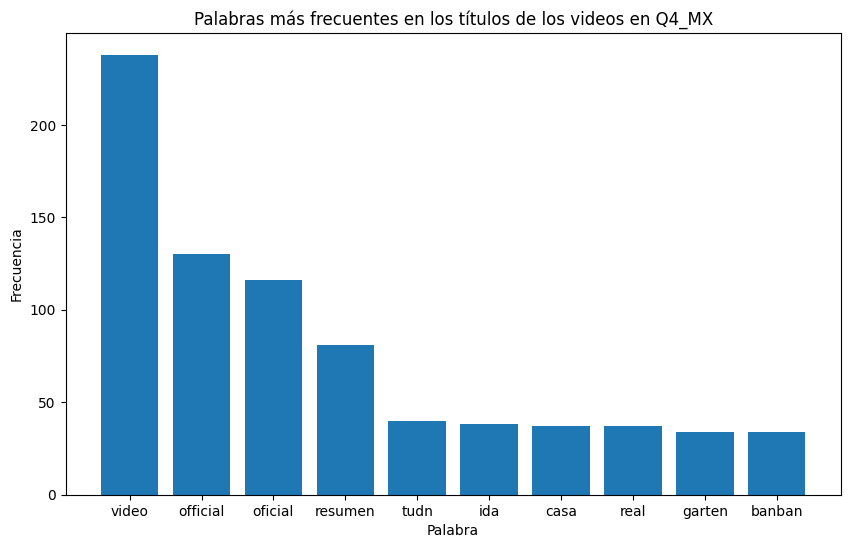

In [80]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words4)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q4_MX')
plt.show()

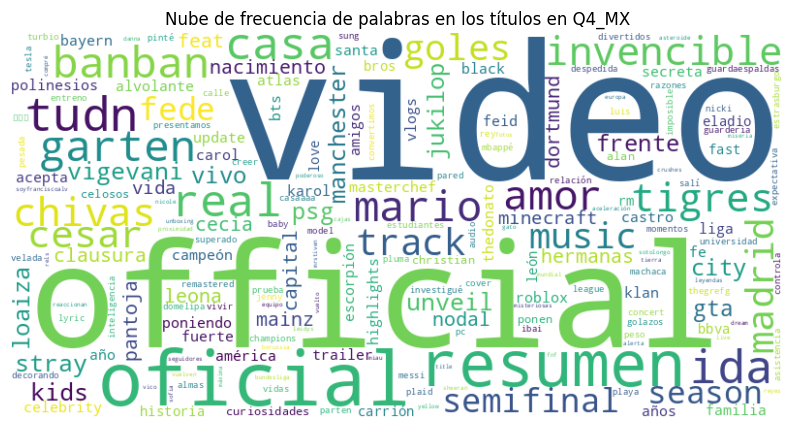

In [81]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q4_MX')
plt.show()


######Datos Q5

In [82]:
# Filtrar los datos correspondientes a la categoría "Q5"
q5_data_mx = data_mx_1.loc[data_mx_1['category_view_count'] == 'Q5']
q5_data_mx

title  view_count  \
203005  Carin León x Camilo - Ni Me Debes, Ni Te Debo ...     2501297   
205494       Chayanne - Bailando Bachata (Official Video)     2501622   
203101  NODAL ROMPE RÉCORD COMPRANDO SNEAKERS! Compró ...     2501820   
204538  Roll Royce - Standly x Katteyes (Prod. Distoba...     2504401   
205682                                                Bye     2514179   
...                                                   ...         ...   
206739                    Ages 1 - 100 Fight For $500,000   111343139   
206944                    Ages 1 - 100 Fight For $500,000   113492235   
207149                    Ages 1 - 100 Fight For $500,000   115652815   
207389                    Ages 1 - 100 Fight For $500,000   118788141   
207592                    Ages 1 - 100 Fight For $500,000   121097804   

       category_view_count  
203005                  Q5  
205494                  Q5  
203101                  Q5  
204538                  Q5  
205682                  Q5  
...                    ...  
206739                  Q5  
206944                  Q5  
207149                  Q5  
207389                  Q5  
207592                  Q5  

[1236 rows x 3 columns]

Procesamiento del campo "title" para extraer las palabras más usadas

In [83]:
# Obtener las stopwords en varios idiomas

stop_words_all=stopwords(['af', 'ar', 'bg', 'bn', 'br', 'ca', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
                          'fa', 'fi', 'fr', 'ga', 'gl', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'it', 'ja',
                          'ko', 'ku', 'la', 'lt', 'lv', 'mr', 'ms', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl',
                          'so', 'st', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zh', 'zu'])

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q5_data_mx['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha()  and word not in stop_words_all]
    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words5 = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words5:
    print(word, "-", freq)

video - 518
official - 332
oficial - 182
music - 63
highlights - 55
kimberly - 54
loaiza - 54
jukilop - 41
blackpink - 39
bunny - 36


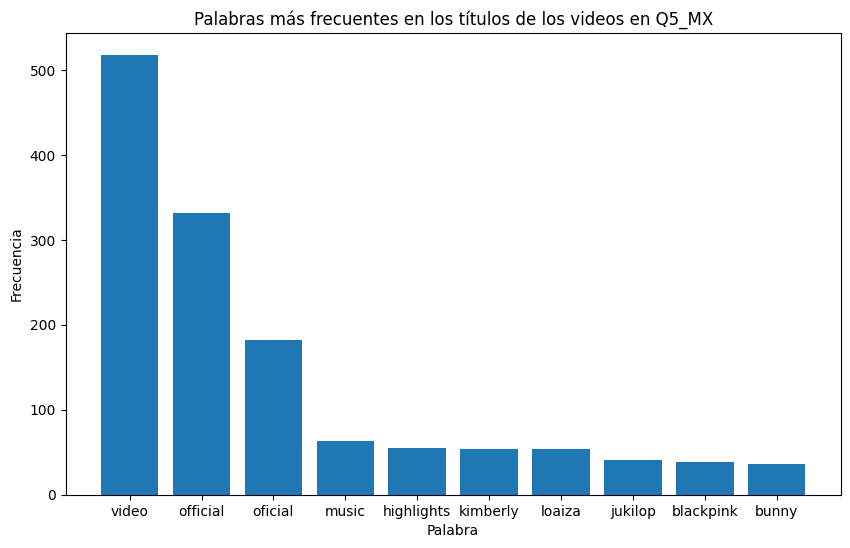

In [84]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words5)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q5_MX')
plt.show()

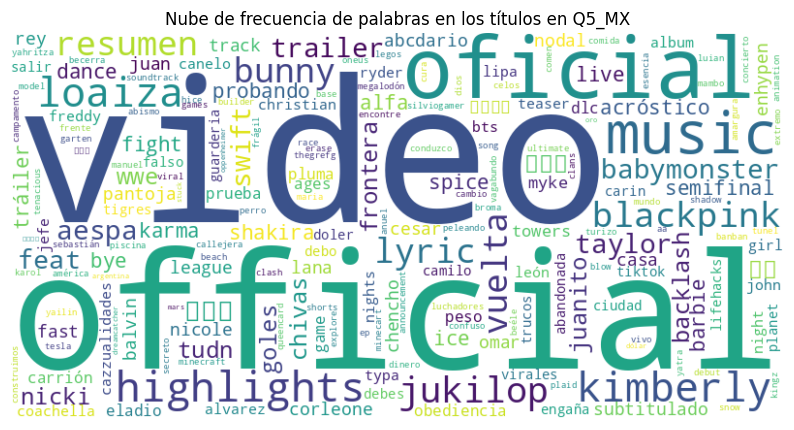

In [85]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q5_MX')
plt.show()


#####Estados Unidos

######Datos Q1

In [86]:
# Filtrar los datos correspondientes a la categoría "Q1"
q1_data_us = data_us_1.loc[data_us_1['category_view_count'] == 'Q1']
q1_data_us

title  view_count  \
200970                    Live at the Met Gala With Vogue           0   
200287                    Live at the Met Gala With Vogue           0   
201188                    Live at the Met Gala With Vogue           0   
200044                    Live at the Met Gala With Vogue           0   
200735                    Live at the Met Gala With Vogue           0   
...                                                   ...         ...   
202907  First Start on An ABANDONED Shelby Daytona Cou...      396790   
204508  NEW Movement Glitches in Tears of The Kingdom ...      396878   
203031  EXCLUSIVE 992 GT3 RS vs Corvette Z06 vs BMW M4...      396962   
200025  Redfall IS A BROKEN MESS! $100 FOR THIS?! - An...      397173   
204042        500 PASSENGERS LEFT STRANDED AT CRUISE PORT      397304   

       category_view_count  
200970                  Q1  
200287                  Q1  
201188                  Q1  
200044                  Q1  
200735                  Q1  
...                    ...  
202907                  Q1  
204508                  Q1  
203031                  Q1  
200025                  Q1  
204042                  Q1  

[1239 rows x 3 columns]

Procesamiento del campo "title" para extraer las palabras más usadas

In [87]:
# Obtener las stopwords en varios idiomas

stop_words_all=stopwords(['af', 'ar', 'bg', 'bn', 'br', 'ca', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
                          'fa', 'fi', 'fr', 'ga', 'gl', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'it', 'ja',
                          'ko', 'ku', 'la', 'lt', 'lv', 'mr', 'ms', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl',
                          'so', 'st', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zh', 'zu'])


# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q1_data_us['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha()  and word not in stop_words_all]
    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words1us = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words1us:
    print(word, "-", freq)




official - 125
video - 93
trailer - 62
game - 56
highlights - 46
tears - 46
life - 42
kingdom - 41
review - 39
pregnant - 36


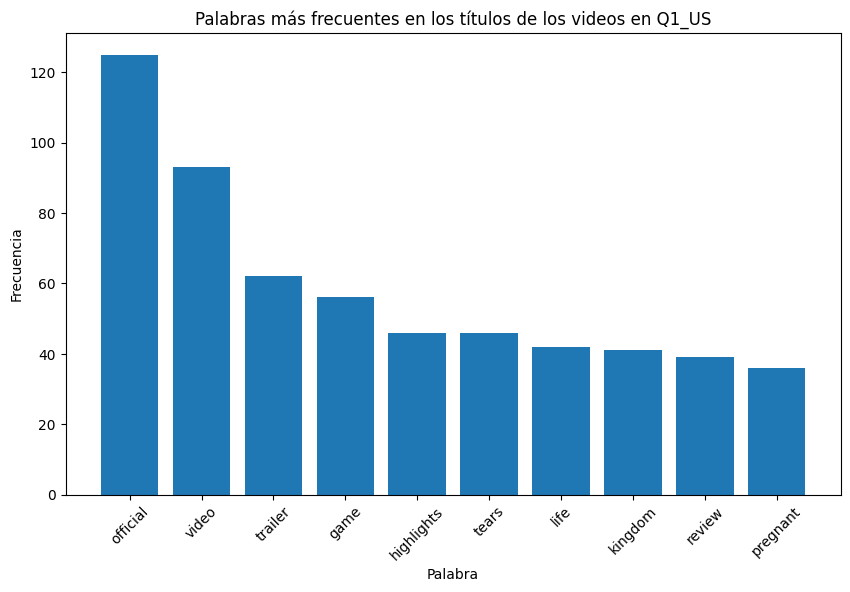

In [88]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words1us)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q1_US')
plt.xticks(rotation=45)
plt.show()

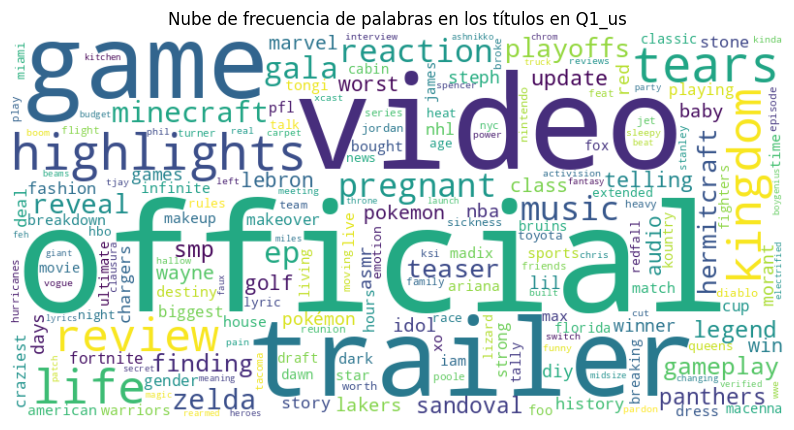

In [89]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q1_us')
plt.show()


######Datos Q2

In [90]:
# Filtrar los datos correspondientes a la categoría "Q2"
q2_data_us = data_us_1.loc[data_us_1['category_view_count'] == 'Q2']
q2_data_us

title  view_count  \
204103         Every Goal Maradona Scores, Is + 1 upgrade      397349   
206144                  The Idol | Official Trailer | HBO      397527   
204966  Opening a $10,000 Pokemon Team Rocket Special ...      397594   
203979             Foo Fighters - Under You (Lyric Video)      397787   
202110      Rutshelle Guillaume - Demoli (Official Video)      398072   
...                                                   ...         ...   
201864  I *very* strongly recommend The Legend of Zeld...      673479   
200034               24 Hours in Kansas City FT AMP & RDC      673561   
202833  How the World’s Most Dangerous Country Solved ...      673713   
199594  Video: Search for 2 missing girls over after a...      673822   
201344  May The 4th Be With You | Star Wars Day | Disney+      674751   

       category_view_count  
204103                  Q2  
206144                  Q2  
204966                  Q2  
203979                  Q2  
202110                  Q2  
...                    ...  
201864                  Q2  
200034                  Q2  
202833                  Q2  
199594                  Q2  
201344                  Q2  

[1238 rows x 3 columns]

Procesamiento del campo "title" para extraer las palabras más usadas

In [91]:
# Obtener las stopwords en varios idiomas

stop_words_all=stopwords(['af', 'ar', 'bg', 'bn', 'br', 'ca', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
                          'fa', 'fi', 'fr', 'ga', 'gl', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'it', 'ja',
                          'ko', 'ku', 'la', 'lt', 'lv', 'mr', 'ms', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl',
                          'so', 'st', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zh', 'zu'])


# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q2_data_us['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha()  and word not in stop_words_all]
    # Agregar las palabras a la lista
    word_list.extend(words)


# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words2us = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words2us:
    print(word, "-", freq)

official - 156
video - 111
trailer - 73
minecraft - 52
game - 50
highlights - 47
lakers - 45
review - 42
warriors - 41
nba - 33


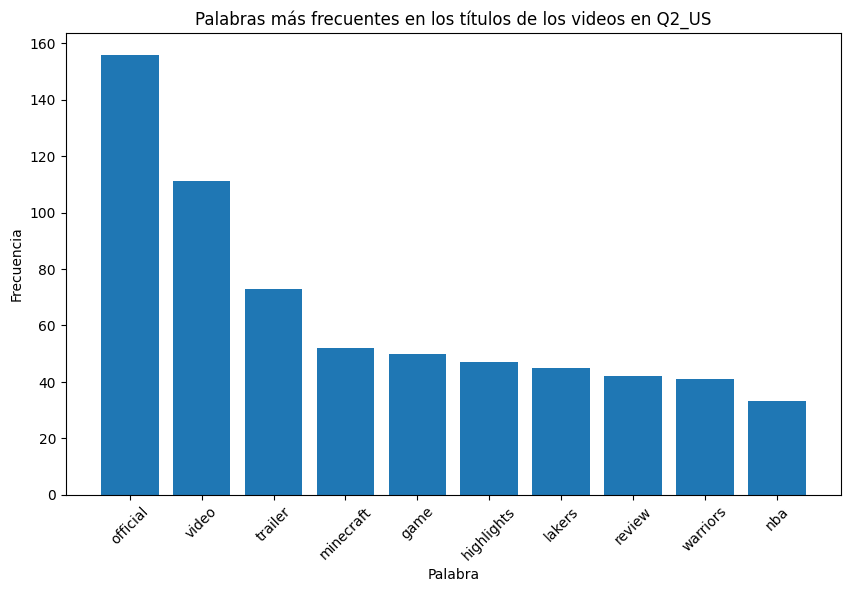

In [92]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words2us)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q2_US')
plt.xticks(rotation=45)
plt.show()

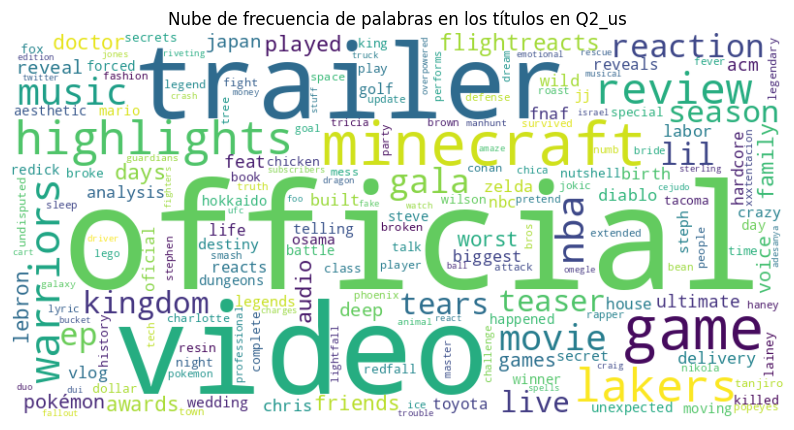

In [93]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q2_us')
plt.show()


######Datos Q3

In [94]:
# Filtrar los datos correspondientes a la categoría "Q3"
q3_data_us = data_us_1.loc[data_us_1['category_view_count'] == 'Q3']
q3_data_us

title  view_count  \
204910  Destroy Lonely - if looks could kill (Official...      675055   
203904     Summer Walker - Pull Up [Official Music Video]      675108   
203437  Fng King - Glorilla Mode (Fet Finesse2tymes) [...      675222   
202723  Lainey Wilson - Grease (Live From The 58th ACM...      675362   
201791  FlightReacts To #6 WARRIORS at #7 LAKERS | FUL...      676004   
...                                                   ...         ...   
205768                                   Did you miss me?     1124575   
202867          The Kai N Speed Show... (Official Teaser)     1125072   
201858         Why This Tiny Honda Engine Can Make 1000hp     1125522   
203392      Food Theory: The SECRET to McDonald’s Sprite!     1125711   
204624           EATING THE WORLD'S MOST DEADLIEST FOODS!     1126323   

       category_view_count  
204910                  Q3  
203904                  Q3  
203437                  Q3  
202723                  Q3  
201791                  Q3  
...                    ...  
205768                  Q3  
202867                  Q3  
201858                  Q3  
203392                  Q3  
204624                  Q3  

[1238 rows x 3 columns]

Procesamiento del campo "title" para extraer las palabras más usadas

In [96]:
# Obtener las stopwords en varios idiomas

stop_words_all=stopwords(['af', 'ar', 'bg', 'bn', 'br', 'ca', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
                          'fa', 'fi', 'fr', 'ga', 'gl', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'it', 'ja',
                          'ko', 'ku', 'la', 'lt', 'lv', 'mr', 'ms', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl',
                          'so', 'st', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zh', 'zu'])

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q3_data_us['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha()  and word not in stop_words_all]
    # Agregar las palabras a la lista
    word_list.extend(words)


# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words3us = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words3us:
    print(word, "-", freq)

official - 134
video - 130
minecraft - 85
nba - 46
game - 41
highlights - 41
music - 40
trailer - 37
wwe - 36
lakers - 35


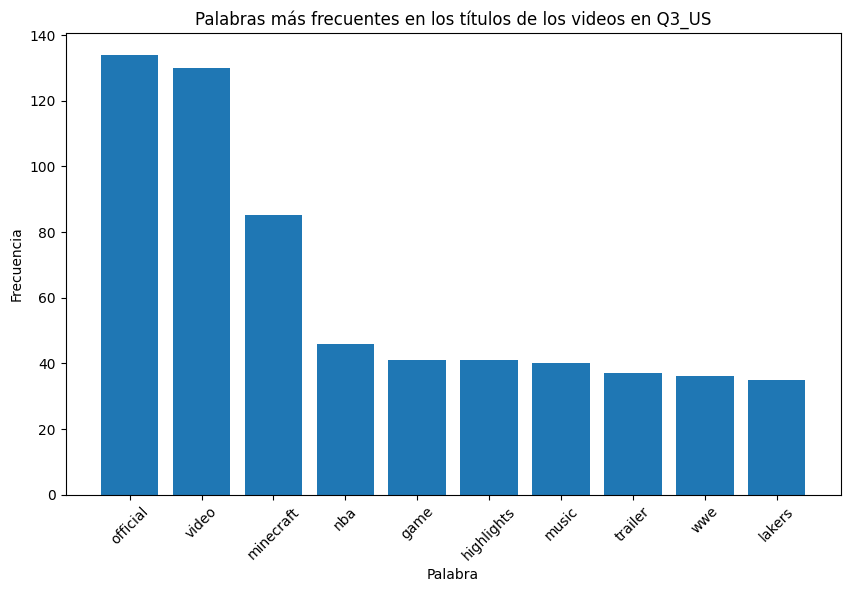

In [97]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words3us)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q3_US')
plt.xticks(rotation=45)
plt.show()

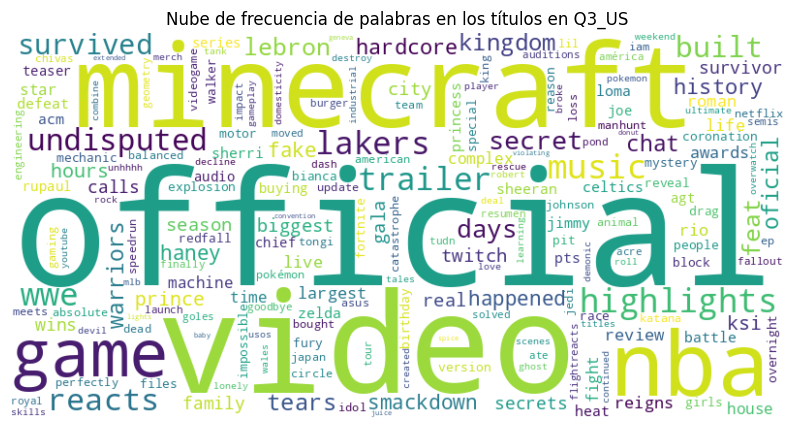

In [98]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q3_US')
plt.show()


######Datos Q4

In [99]:
# Filtrar los datos correspondientes a la categoría "43"
q4_data_us = data_us_1.loc[data_us_1['category_view_count'] == 'Q4']
q4_data_us

title  view_count  \
204590  Dads VS Daughters! Who is Stronger? Mila & Sal...     1126633   
204548                    I Trained Like An Olympic Boxer     1127365   
203225  Conan Gray - Never Ending Song (Official Music...     1128884   
200411     Peso Pluma, Eladio Carrión - 77 (Letra/Lyrics)     1129031   
201189                                  I'M Z-O-M-B-I-E-S     1129558   
...                                                   ...         ...   
203616  CHAMPIONS! Manchester City raise the Premier L...     2354423   
203853  CHAMPIONS! Manchester City raise the Premier L...     2357900   
204090  CHAMPIONS! Manchester City raise the Premier L...     2358267   
204303  CHAMPIONS! Manchester City raise the Premier L...     2358899   
202681  WINNER'S PERFORMANCE: Loreen - Tattoo ✨ | Swed...     2359208   

       category_view_count  
204590                  Q4  
204548                  Q4  
203225                  Q4  
200411                  Q4  
201189                  Q4  
...                    ...  
203616                  Q4  
203853                  Q4  
204090                  Q4  
204303                  Q4  
202681                  Q4  

[1238 rows x 3 columns]

Procesamiento del campo "title" para extraer las palabras más usadas

In [100]:
# Obtener las stopwords en varios idiomas

stop_words_all=stopwords(['af', 'ar', 'bg', 'bn', 'br', 'ca', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
                          'fa', 'fi', 'fr', 'ga', 'gl', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'it', 'ja',
                          'ko', 'ku', 'la', 'lt', 'lv', 'mr', 'ms', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl',
                          'so', 'st', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zh', 'zu'])

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q4_data_us['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha()  and word not in stop_words_all]
    # Agregar las palabras a la lista
    word_list.extend(words)


# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words4us = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words4us:
    print(word, "-", freq)

video - 179
official - 169
trailer - 73
highlights - 57
game - 56
minecraft - 54
oficial - 46
music - 42
star - 34
city - 31


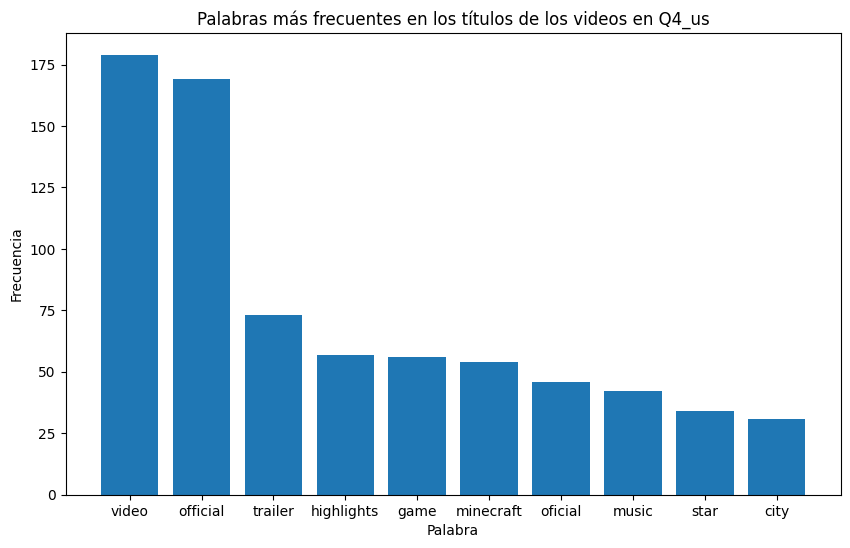

In [101]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words4us)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q4_us')
plt.show()

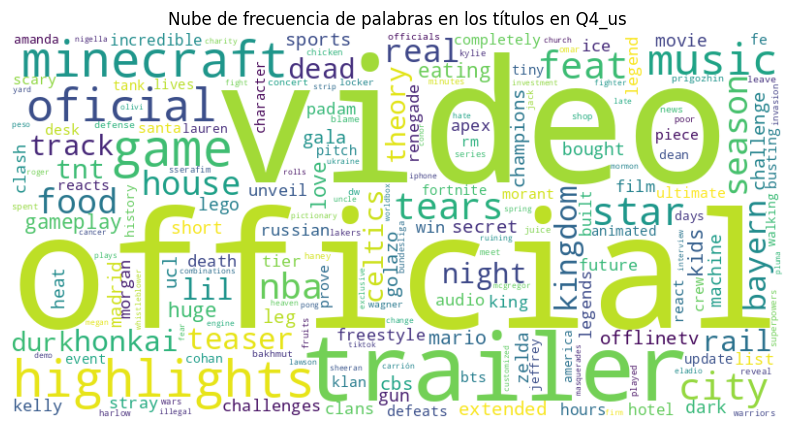

In [102]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q4_us')
plt.show()


######Datos Q5

In [103]:
# Filtrar los datos correspondientes a la categoría "Q5"
q5_data_us = data_us_1.loc[data_us_1['category_view_count'] == 'Q5']
q5_data_us

title  view_count  \
204533  CHAMPIONS! Manchester City raise the Premier L...     2359415   
201187  Jack Harlow - They Don't Love It [Official Mus...     2360603   
203192  Five Nights at Freddy's: Security Breach Ruin ...     2361564   
204567     The Biggest Weather Event This Year Is Coming…     2365084   
204300  Marvel Studios’ Secret Invasion | Fight | Disney+     2367466   
...                                                   ...         ...   
205422                    Ages 1 - 100 Fight For $500,000    84406948   
205657                    Ages 1 - 100 Fight For $500,000    90058865   
205893                    Ages 1 - 100 Fight For $500,000    95520120   
206127                    Ages 1 - 100 Fight For $500,000   100294791   
206356                    Ages 1 - 100 Fight For $500,000   103921838   

       category_view_count  
204533                  Q5  
201187                  Q5  
203192                  Q5  
204567                  Q5  
204300                  Q5  
...                    ...  
205422                  Q5  
205657                  Q5  
205893                  Q5  
206127                  Q5  
206356                  Q5  

[1238 rows x 3 columns]

Procesamiento del campo "title" para extraer las palabras más usadas

In [104]:
# Obtener las stopwords en varios idiomas

stop_words_all=stopwords(['af', 'ar', 'bg', 'bn', 'br', 'ca', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
                          'fa', 'fi', 'fr', 'ga', 'gl', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'it', 'ja',
                          'ko', 'ku', 'la', 'lt', 'lv', 'mr', 'ms', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl',
                          'so', 'st', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zh', 'zu'])

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q5_data_us['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha()  and word not in stop_words_all]
    # Agregar las palabras a la lista
    word_list.extend(words)


# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words5us = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words5us:
    print(word, "-", freq)

official - 330
video - 285
trailer - 156
highlights - 118
game - 94
music - 62
oficial - 53
emotional - 49
idol - 40
celtics - 38


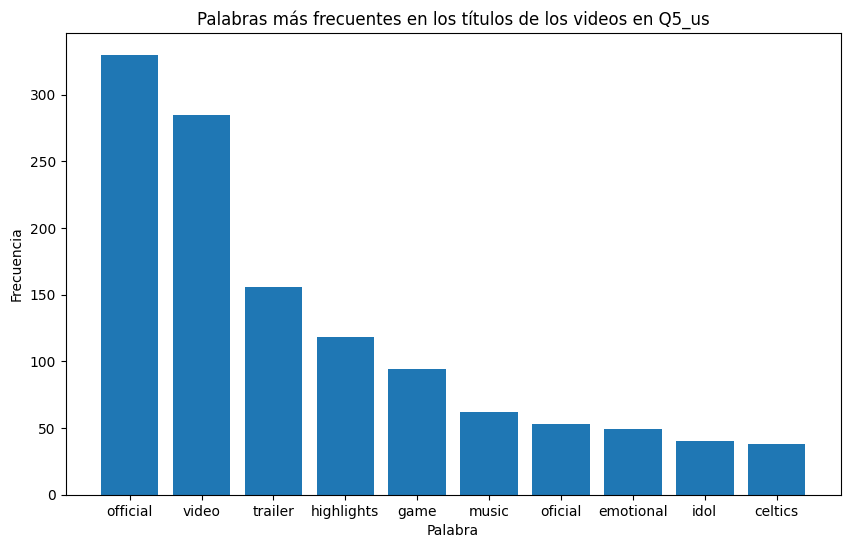

In [106]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words5us)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q5_us')
plt.show()

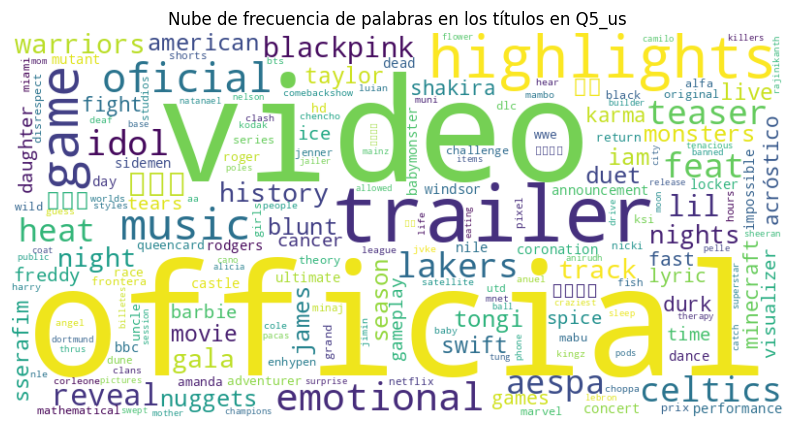

In [107]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q5_us')
plt.show()


###Correlación entre variables de popularidad con el título
  * 1 = una fuerte correlación positiva
  * 0 = sin correlación
  * -1 = fuerte correlación negativa.

####México

In [108]:
from sklearn.preprocessing import LabelEncoder

df_MX_lb=df_MX.copy()

# Codificar el título utilizando LabelEncoder
label_encoder = LabelEncoder()

df_MX_lb['Encoded_Title'] = label_encoder.fit_transform(df_MX_lb['title'])

# Calcular la matriz de correlación
correlation_mx = df_MX_lb[['Encoded_Title','view_count', 'likes', 'dislikes', 'comment_count']].corr()
correlation_mx

Encoded_Title  view_count     likes  dislikes  comment_count
Encoded_Title       1.000000   -0.039519 -0.045888 -0.036128      -0.025146
view_count         -0.039519    1.000000  0.839989  0.464737       0.655744
likes              -0.045888    0.839989  1.000000  0.494188       0.748675
dislikes           -0.036128    0.464737  0.494188  1.000000       0.519750
comment_count      -0.025146    0.655744  0.748675  0.519750       1.000000

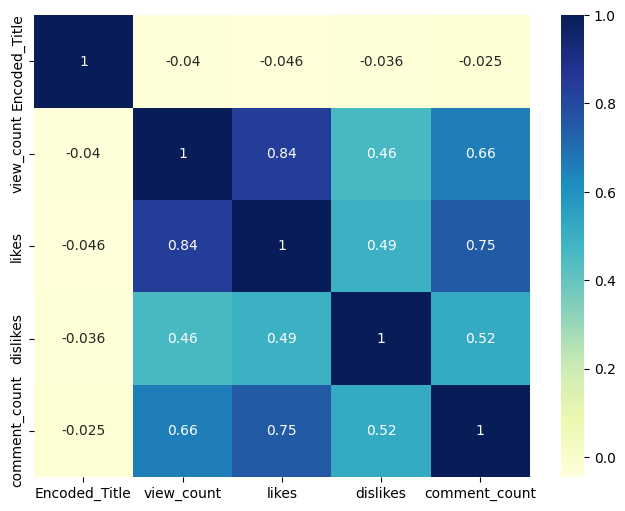

In [114]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot
matplotlib.pyplot.figure(figsize=(8,6))
sns.heatmap(correlation_mx, annot=True, cmap ='YlGnBu');

####Estados Unidos

In [110]:
df_US_lb=df_US.copy()

# Codificar el título utilizando LabelEncoder
label_encoder = LabelEncoder()

df_US_lb['Encoded_Title'] = label_encoder.fit_transform(df_US_lb['title'])

# Calcular la matriz de correlación
correlation_us = df_US_lb[['Encoded_Title','view_count', 'likes', 'dislikes', 'comment_count']].corr()
correlation_us

Encoded_Title  view_count     likes  dislikes  comment_count
Encoded_Title       1.000000   -0.029553 -0.028694 -0.023522      -0.026067
view_count         -0.029553    1.000000  0.860434  0.488334       0.588687
likes              -0.028694    0.860434  1.000000  0.484752       0.734574
dislikes           -0.023522    0.488334  0.484752  1.000000       0.430177
comment_count      -0.026067    0.588687  0.734574  0.430177       1.000000

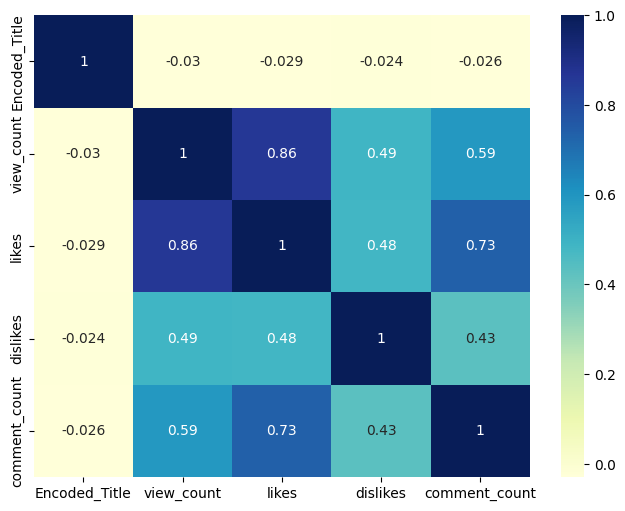

In [111]:
matplotlib.pyplot.figure(figsize=(8,6))
sns.heatmap(correlation_us, annot=True, cmap ='YlGnBu');

##Análisis de Resultados:

In [112]:

# Crear un DataFrame con las palabras más frecuentes por quintil para MX y US
df_top_words = pd.DataFrame({
    'Quintil 1-MX': [word for word, _ in top_words1],
    'Quintil 2-MX': [word for word, _ in top_words2],
    'Quintil 3-MX': [word for word, _ in top_words3],
    'Quintil 4-MX': [word for word, _ in top_words4],
    'Quintil 5-MX': [word for word, _ in top_words5],
    'Quintil 1-us': [word for word, _ in top_words1us],
    'Quintil 2-US': [word for word, _ in top_words2us],
    'Quintil 3-US': [word for word, _ in top_words3us],
    'Quintil 4-US': [word for word, _ in top_words4us],
    'Quintil 5-US': [word for word, _ in top_words5us]
})

df_top_words

Quintil 1-MX Quintil 2-MX Quintil 3-MX Quintil 4-MX Quintil 5-MX  \
0         liga        video        video        video        video   
1       chivas      oficial       banban     official     official   
2        video     official    minecraft      oficial      oficial   
3      resumen    minecraft      oficial      resumen        music   
4      oficial       banban     official         tudn   highlights   
5       tigres       garten       garten          ida     kimberly   
6         mamá        mundo         amor         casa       loaiza   
7     clausura      cocinar   invencible         real      jukilop   
8      familia        pesos         casa       garten    blackpink   
9       méxico     historia      shakira       banban        bunny   

  Quintil 1-us Quintil 2-US Quintil 3-US Quintil 4-US Quintil 5-US  
0     official     official     official        video     official  
1        video        video        video     official        video  
2      trailer      trailer    minecraft      trailer      trailer  
3         game    minecraft          nba   highlights   highlights  
4   highlights         game         game         game         game  
5        tears   highlights   highlights    minecraft        music  
6         life       lakers        music      oficial      oficial  
7      kingdom       review      trailer        music    emotional  
8       review     warriors          wwe         star         idol  
9     pregnant          nba       lakers         city      celtics

**10 palabras más comunes en titulos de videos mas populares (Quintil 5) MX y USA en Mayo 2023**

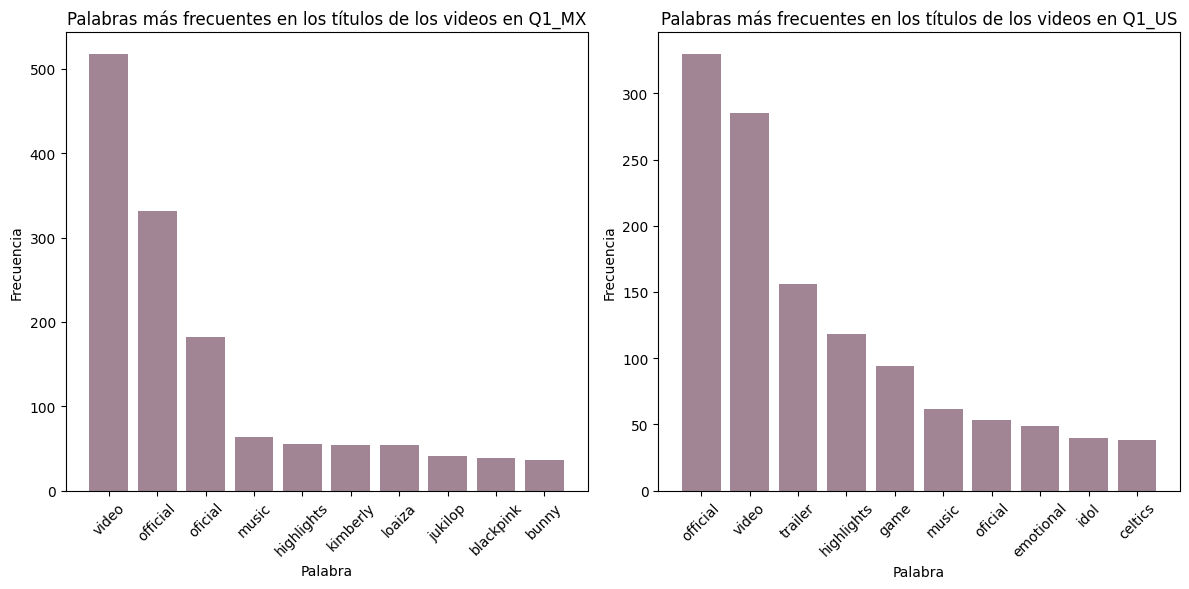

In [117]:

# Gráfico de barras de las palabras más frecuentes en MX
labels1, values1 = zip(*top_words5)
# Gráfico de barras de las palabras más frecuentes en US
labels2, values2 = zip(*top_words5us)

# Configurar el tamaño de la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

color1 = '#A18594'  # Código hexadecimal para lila pastel
ax1.bar(labels1, values1, color=color1)
ax1.set_xlabel('Palabra')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Palabras más frecuentes en los títulos de los videos en Q1_MX')
ax1.tick_params(axis='x', rotation=45)

color2 = '#A18594'
ax2.bar(labels2, values2, color=color2)
ax2.set_xlabel('Palabra')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Palabras más frecuentes en los títulos de los videos en Q1_US')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Mostrar el gráfico
plt.show()


**10 palabras más comunes en titulos de videos menos populares (Quintil 1) MX y USA en Mayo 2023**

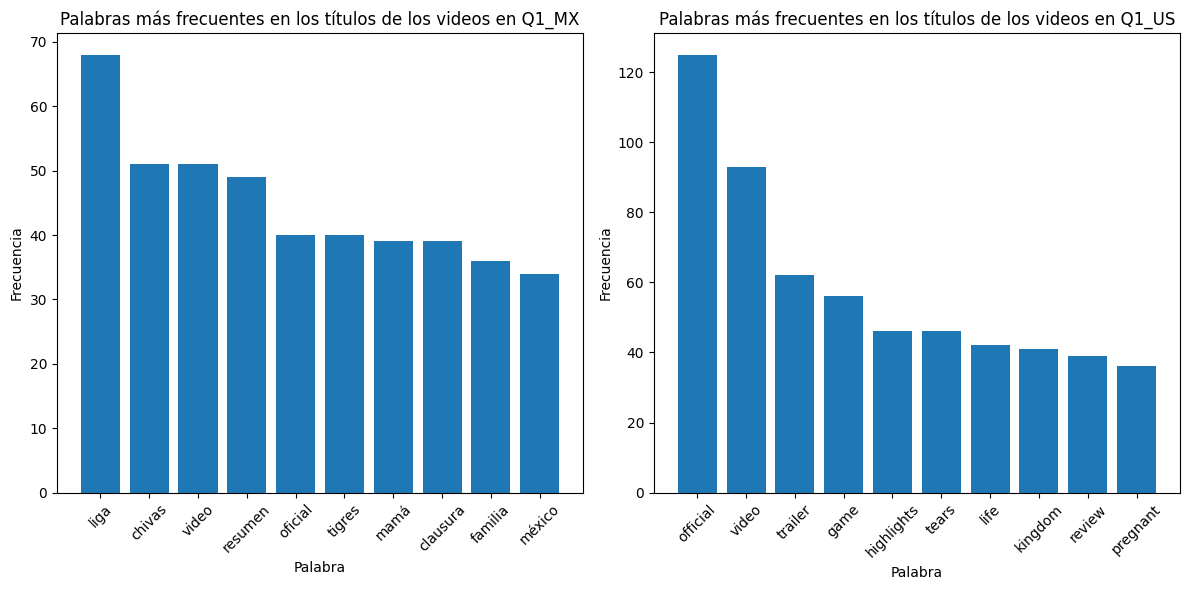

In [119]:
# Gráfico de barras de las palabras más frecuentes en MX
labels1, values1 = zip(*top_words1)
# Gráfico de barras de las palabras más frecuentes en US
labels2, values2 = zip(*top_words1us)

# Configurar el tamaño de la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Generar el primer gráfico de barras
ax1.bar(labels1, values1)
ax1.set_xlabel('Palabra')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Palabras más frecuentes en los títulos de los videos en Q1_MX')
ax1.tick_params(axis='x', rotation=45)

# Generar el segundo gráfico de barras
ax2.bar(labels2, values2)
ax2.set_xlabel('Palabra')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Palabras más frecuentes en los títulos de los videos en Q1_US')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()



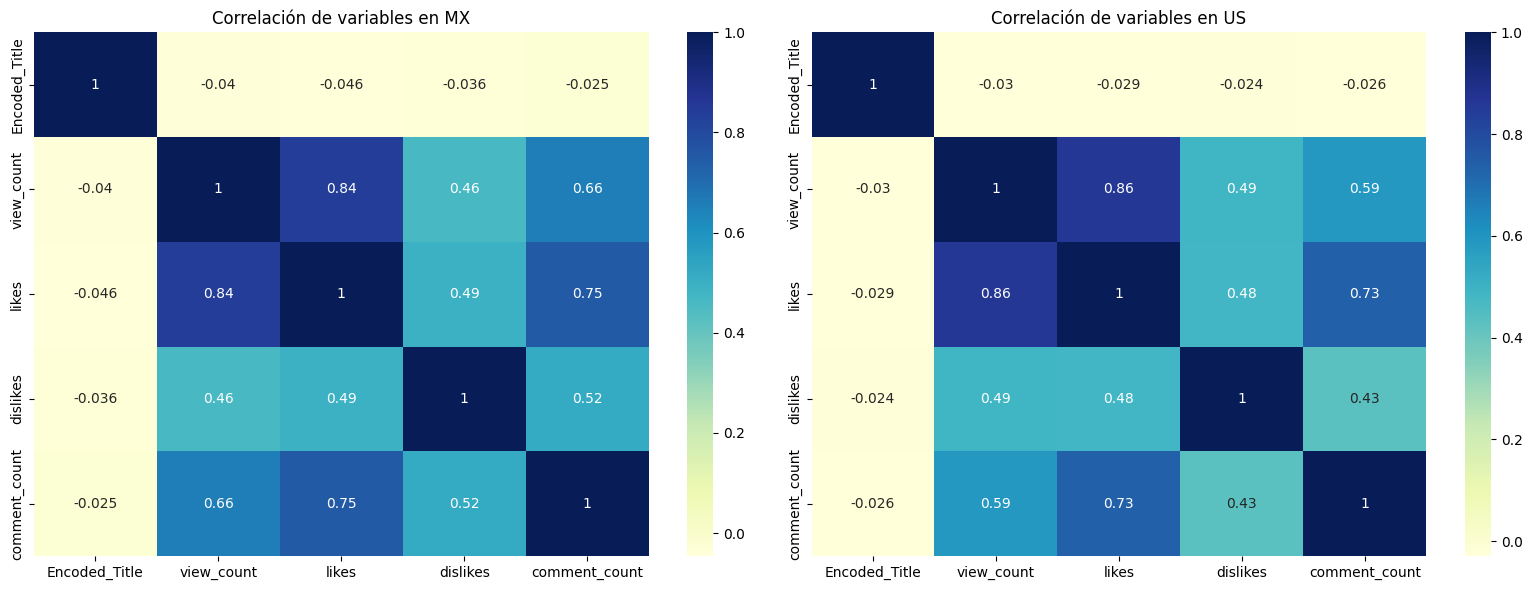

In [120]:
# Configurar el tamaño de la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de correlación para MX
plt.subplot(1, 2, 1)
sns.heatmap(correlation_mx, annot=True, cmap='YlGnBu')
plt.title('Correlación de variables en MX')

# Gráfico de correlación para US
plt.subplot(1, 2, 2)
sns.heatmap(correlation_us, annot=True, cmap='YlGnBu')
plt.title('Correlación de variables en US')

plt.tight_layout()

plt.show()

##Conclusiones:




*   El análisis de los videos de tendencia en YouTube nos permitió identificar los temas más populares para las regiones de México y Estados Unidos. En México, se observó un interés significativo en videos musicales, con artistas como Kimberly Loaiza y el grupo Blackpink destacando entre los temas más populares. En Estados Unidos, además del interés en videos musicales, se evidenció un enfoque en tráilers, momentos destacados (highlights) y contenido relacionado con juegos y deportes.

*   Al analizar la correlación entre el título del video y las métricas de popularidad, como el número de visualizaciones, likes, dislikes y comentarios, se encontró una correlación baja en ambas regiones. Esto sugiere que, si bien el título es importante, otros factores, como la calidad del contenido, el formato o la promoción, también influyen significativamente en la popularidad de los videos.

* Finalmente estos resultados proporcionan una visión clara de los temas más populares en los videos de tendencia durante el mes de mayo de 2023 para ambas regiones. Los creadores de contenido pueden utilizar esta información para adaptar su estrategia y crear contenido que se alinee con las preferencias de la audiencia en cada región

